# DX 704 Week 2 Project

This week's project will analyze fresh strawberry price data for a hypothetical "buy low, freeze, and sell high" business.
Strawberries show strong seasonality in their prices compared to other fruits.

![](https://ers.usda.gov/sites/default/files/_laserfiche/Charts/61401/oct14_finding_plattner_fig01.png)

Image source: https://www.ers.usda.gov/amber-waves/2014/october/seasonal-fresh-fruit-price-patterns-differ-across-commodities-the-case-of-strawberries-and-apples

You are considering a business where you buy strawberries when the prices are very low, carefully freeze them, even more carefully defrost them, and then sell them when the prices are high.
You will forecast strawberry price time series and then use them to tactically pick times to buy, freeze, and sell the strawberries.

The full project description, a template notebook, and raw data are available on GitHub at the following link.

https://github.com/bu-cds-dx704/dx704-project-02


### Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Backtest Strawberry Prices

Read the provided "strawberry-prices.tsv" with data from 2020 through 2024.
This data is based on data from the U.S. Bureau of Statistics, but transformed so the ground truth is not online.
https://fred.stlouisfed.org/series/APU0000711415

Use the data for 2020 through 2023 to predict monthly prices in 2024.
Spend some time to make sure you are happy with your methodology and prediction accuracy, since you will reuse the methodology to forecast 2025 next.
Save the 2024 backtest predictions as "strawberry-backtest.tsv" with columns month and price.


In [2]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 9.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


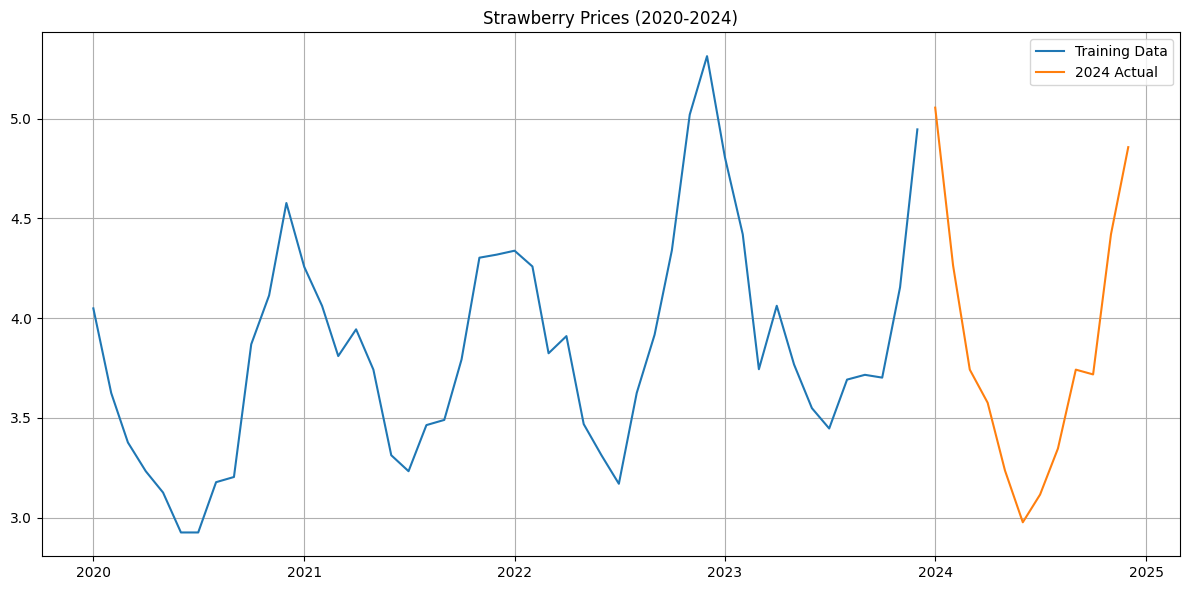

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

Mean Absolute Error for 2024 backtest: 0.417
Saved backtest predictions to 'strawberry-backtest.tsv'


In [3]:
# YOUR CHANGES HERE

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Load the data
df = pd.read_csv("strawberry-prices.tsv", sep="\t", parse_dates=["month"])
df.set_index("month", inplace=True)
df = df.asfreq("MS")  # Ensure it's monthly start frequency

# Split the data
train = df[:'2023-12-01']
test_2024 = df['2024-01-01':'2024-12-01']

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price'], label='Training Data')
plt.plot(test_2024.index, test_2024['price'], label='2024 Actual')
plt.title("Strawberry Prices (2020-2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit SARIMA model
model = SARIMAX(train['price'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Forecast 2024
forecast_2024 = model_fit.predict(start="2024-01-01", end="2024-12-01")

# Evaluate accuracy
mae = mean_absolute_error(test_2024['price'], forecast_2024)
print(f"Mean Absolute Error for 2024 backtest: {mae:.3f}")

# Save the forecast
forecast_2024_df = forecast_2024.reset_index()
forecast_2024_df.columns = ["month", "price"]
forecast_2024_df.to_csv("strawberry-backtest.tsv", sep="\t", index=False)
print("Saved backtest predictions to 'strawberry-backtest.tsv'")


Submit "strawberry-backtest.tsv" in Gradescope.

## Part 2: Backtest Errors

What are the mean and standard deviation of the residuals between your backtest predictions and the ground truth? (If your mean is not close to zero, then you may be missing a long term trend.)

Write the mean and standard deviation to a file "backtest-accuracy.tsv" with two columns, mean and std.

In [4]:
# YOUR CHANGES HERE

# Calculate residuals
residuals = test_2024['price'] - forecast_2024

# Compute mean and standard deviation
residuals_mean = residuals.mean()
residuals_std = residuals.std()

# Save to TSV
accuracy_df = pd.DataFrame({
    'mean': [residuals_mean],
    'std': [residuals_std]
})
accuracy_df.to_csv("backtest-accuracy.tsv", sep="\t", index=False)
print("Saved residual stats to 'backtest-accuracy.tsv'")


Saved residual stats to 'backtest-accuracy.tsv'


Submit "backtest-accuracy.tsv" in Gradescope.

## Part 3: Forecast Strawberry Prices

Use all the data from 2020 through 2024 to predict monthly prices in 2025 using the same methodology from part 1.
Make a monthly forecast for each month of 2025 and save it as "strawberry-forecast.tsv" with columns for month and price.

In [5]:
# YOUR CHANGES HERE

# Retrain model on all available data through 2024
full_model = SARIMAX(df['price'], order=(1,1,1), seasonal_order=(1,1,1,12))
full_model_fit = full_model.fit(disp=False)

# Forecast for 2025
forecast_2025 = full_model_fit.predict(start="2025-01-01", end="2025-12-01")

# Save the 2025 forecast
forecast_2025_df = forecast_2025.reset_index()
forecast_2025_df.columns = ["month", "price"]
forecast_2025_df.to_csv("strawberry-forecast.tsv", sep="\t", index=False)
print("Saved 2025 forecast to 'strawberry-forecast.tsv'")


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Saved 2025 forecast to 'strawberry-forecast.tsv'


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Submit "strawberry-forecast.tsv" in Gradescope.

## Part 4: Buy Low, Freeze and Sell High

Using your 2025 forecast, analyze the profit picking different pairs of months to buy and sell strawberries.
Maximize your profit assuming that it costs &dollar;0.20 per pint to freeze the strawberries, &dollar;0.10 per pint per month to store the frozen strawberries and there is a 10% price discount from selling previously frozen strawberries.
So, if you buy a pint of strawberies for &dollar;1, freeze them, and sell them for &dollar;2 three months after buying them, then the profit is &dollar;2 * 0.9 - &dollar;1 - &dollar;0.20 - &dollar;0.10 * 3 = &dollar;0.30 per pint.
To evaluate a given pair of months, assume that you can invest &dollar;1,000,000 to cover all costs, and that you buy as many pints of strawberries as possible.

Write the results of your analysis to a file "timings.tsv" with columns for the buy_month, sell_month, pints_purchased, and expected_profit.

In [10]:
# YOUR CHANGES HERE

from math import floor

# Load 
forecast_2025 = pd.read_csv("strawberry-forecast.tsv", sep="\t", parse_dates=["month"])
forecast_2025.set_index("month", inplace=True)

# Constants
FREEZE_COST = 0.20
STORAGE_COST_PER_MONTH = 0.10
DISCOUNT = 0.9
INVESTMENT = 1_000_000

results = []


for buy_idx in range(len(forecast_2025)):
    for sell_idx in range(buy_idx + 1, len(forecast_2025)):
        buy_month = forecast_2025.index[buy_idx]
        sell_month = forecast_2025.index[sell_idx]

        p_buy = forecast_2025.iloc[buy_idx]['price']
        p_sell = forecast_2025.iloc[sell_idx]['price']

        months_stored = (sell_month.to_period('M') - buy_month.to_period('M')).n
        cost_per_pint = p_buy + FREEZE_COST + STORAGE_COST_PER_MONTH * months_stored
        sell_price = DISCOUNT * p_sell

        profit_per_pint = sell_price - cost_per_pint
        if profit_per_pint <= 0:
            continue  # not profitable

        pints = floor(INVESTMENT / cost_per_pint)
        total_profit = profit_per_pint * pints

        results.append({
            "buy_month": buy_month.strftime('%Y-%m'),
            "sell_month": sell_month.strftime('%Y-%m'),
            "pints_purchased": pints,
            "expected_profit": round(total_profit, 2)
        })

# Convert to DataFrame and sort by expected_profit descending
results_df = pd.DataFrame(results)
results_df.sort_values(by="expected_profit", ascending=False, inplace=True)

# Save to file
results_df.to_csv("timings.tsv", sep="\t", index=False)
print("Saved optimal buy/sell analysis to 'timings.tsv'")


Saved optimal buy/sell analysis to 'timings.tsv'


Submit "timings.tsv" in Gradescope.

## Part 5: Strategy Check

What is the best profit scenario according to your previous timing analysis?
How much does that profit change if the sell price is off by one standard deviation from your backtest analysis?
(Variation in the sell price is more dangerous because you can see the buy price before fully committing.)

Write the results to a file "check.tsv" with columns best_profit and one_std_profit.

In [9]:
# YOUR CHANGES HERE

import pandas as pd
from math import floor


timings = pd.read_csv("timings.tsv", sep="\t")
best = timings.iloc[0]  # already sorted by expected_profit desc


accuracy = pd.read_csv("backtest-accuracy.tsv", sep="\t")
residual_std = accuracy['std'].iloc[0]


forecast = pd.read_csv("strawberry-forecast.tsv", sep="\t", parse_dates=["month"])
forecast.set_index("month", inplace=True)

# Constants
FREEZE_COST = 0.20
STORAGE_COST_PER_MONTH = 0.10
DISCOUNT = 0.9
INVESTMENT = 1_000_000

# Recalculate 
buy_month = pd.to_datetime(best['buy_month'])
sell_month = pd.to_datetime(best['sell_month'])
months_stored = (sell_month.to_period('M') - buy_month.to_period('M')).n

p_buy = forecast.loc[buy_month]['price']
p_sell = forecast.loc[sell_month]['price'] - residual_std  # adjusted sell price

cost_per_pint = p_buy + FREEZE_COST + STORAGE_COST_PER_MONTH * months_stored
sell_price = DISCOUNT * p_sell
profit_per_pint = sell_price - cost_per_pint
if profit_per_pint > 0:
    pints = floor(INVESTMENT / cost_per_pint)
    new_profit = round(pints * profit_per_pint, 2)
else:
    new_profit = 0.0

# Save to check.tsv
check_df = pd.DataFrame({
    "best_profit": [round(best['expected_profit'], 2)],
    "one_std_profit": [new_profit]
})
check_df.to_csv("check.tsv", sep="\t", index=False)
print("Saved profit sensitivity analysis to 'check.tsv'")


Saved profit sensitivity analysis to 'check.tsv'


Submit "check.tsv" in Gradescope.

## Part 6: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgments are appropriate, just write none in the file.


Submit "acknowledgments.txt" in Gradescope.

## Part 7: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.
You do not need to provide code for data collection if you did that by manually.

Submit "project.ipynb" in Gradescope.